In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
import pandas as pd

In [3]:
from batterytrading.data_loader import get_data

In [4]:
df = get_data("../")

In [5]:
df = df.sort_index()

In [6]:
df.resample("1H").mean()

,Import Balance,Conventional > 100 MW,Wind,Solar,Intraday Auction 15 minute call,Intraday Continuous 15 minutes Average Price,Intraday Continuous 15 minutes Low Price,Intraday Continuous 15 minutes High Price,Load,Conventional > 100 MW planned,Wind forecast,Solar forecast,Load forecast,Intraday Continuous 15 minutes Index Price,intraday_15min,Intraday Continuous 15 minutes ID1-Price,Non-Renewable,Renewable,day_ahead
date,,,,,,,,,,,,,,,,,,,
2015-01-04 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.6325,NaN,NaN,NaN,22.34
2015-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0825,NaN,NaN,NaN,17.93
2015-01-05 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2875,NaN,NaN,NaN,15.17
2015-01-05 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7950,NaN,NaN,NaN,16.38
2015-01-05 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6000,NaN,NaN,NaN,17.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,495.2050,NaN,NaN,NaN,412.03
2022-09-25 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417.2325,NaN,NaN,NaN,393.92
2022-09-25 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.3175,NaN,NaN,NaN,369.97


In [7]:
print(f"START DATA: {df.index.min()}, END DATA: {df.index.max()}, LENGTH: {df.index.max()-df.index.min()}")

START DATA: 2015-01-04 23:00:00, END DATA: 2022-09-25 21:00:00, LENGTH: 2820 days 22:00:00


In [14]:
df["intraday_15min"].iloc[-24:]

date
2022-09-25 15:15:00    352.18
2022-09-25 15:30:00    423.20
2022-09-25 15:45:00    459.48
2022-09-25 16:00:00    305.59
2022-09-25 16:15:00    363.19
2022-09-25 16:30:00    442.31
2022-09-25 16:45:00    491.20
2022-09-25 17:00:00    420.81
2022-09-25 17:15:00    523.72
2022-09-25 17:30:00    518.67
2022-09-25 17:45:00    517.62
2022-09-25 18:00:00    504.74
2022-09-25 18:15:00    398.32
2022-09-25 18:30:00    407.94
2022-09-25 18:45:00    357.93
2022-09-25 19:00:00    432.65
2022-09-25 19:15:00    368.72
2022-09-25 19:30:00    348.03
2022-09-25 19:45:00    303.87
2022-09-25 20:00:00    416.41
2022-09-25 20:15:00    380.24
2022-09-25 20:30:00    374.59
2022-09-25 20:45:00    318.45
2022-09-25 21:00:00    398.25
Name: intraday_15min, dtype: float64

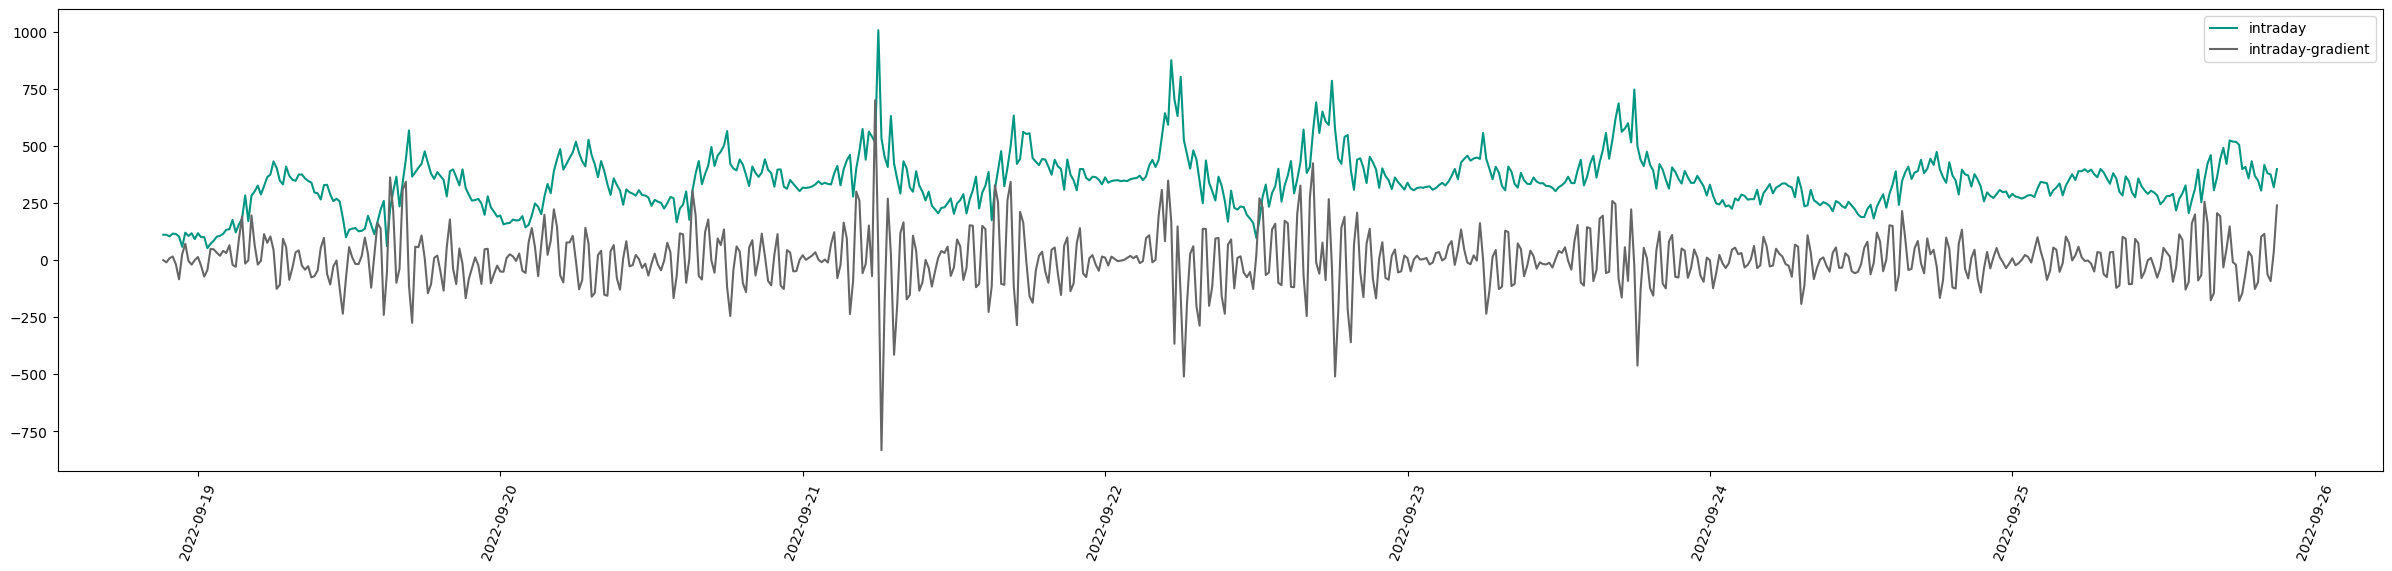

In [31]:
fig, axs = plt.subplots(figsize = (30,6))

plt.plot(df["intraday_15min"].iloc[-24*4*7:], label = "intraday", c = "#009682", )
plt.plot(df["intraday_15min"].iloc[-24*4*7:].index,np.gradient(df["intraday_15min"].iloc[-24*4*7:]*3), label = "intraday-gradient", c = "#666666", )
plt.legend()
plt.xticks(rotation=70)
plt.show()

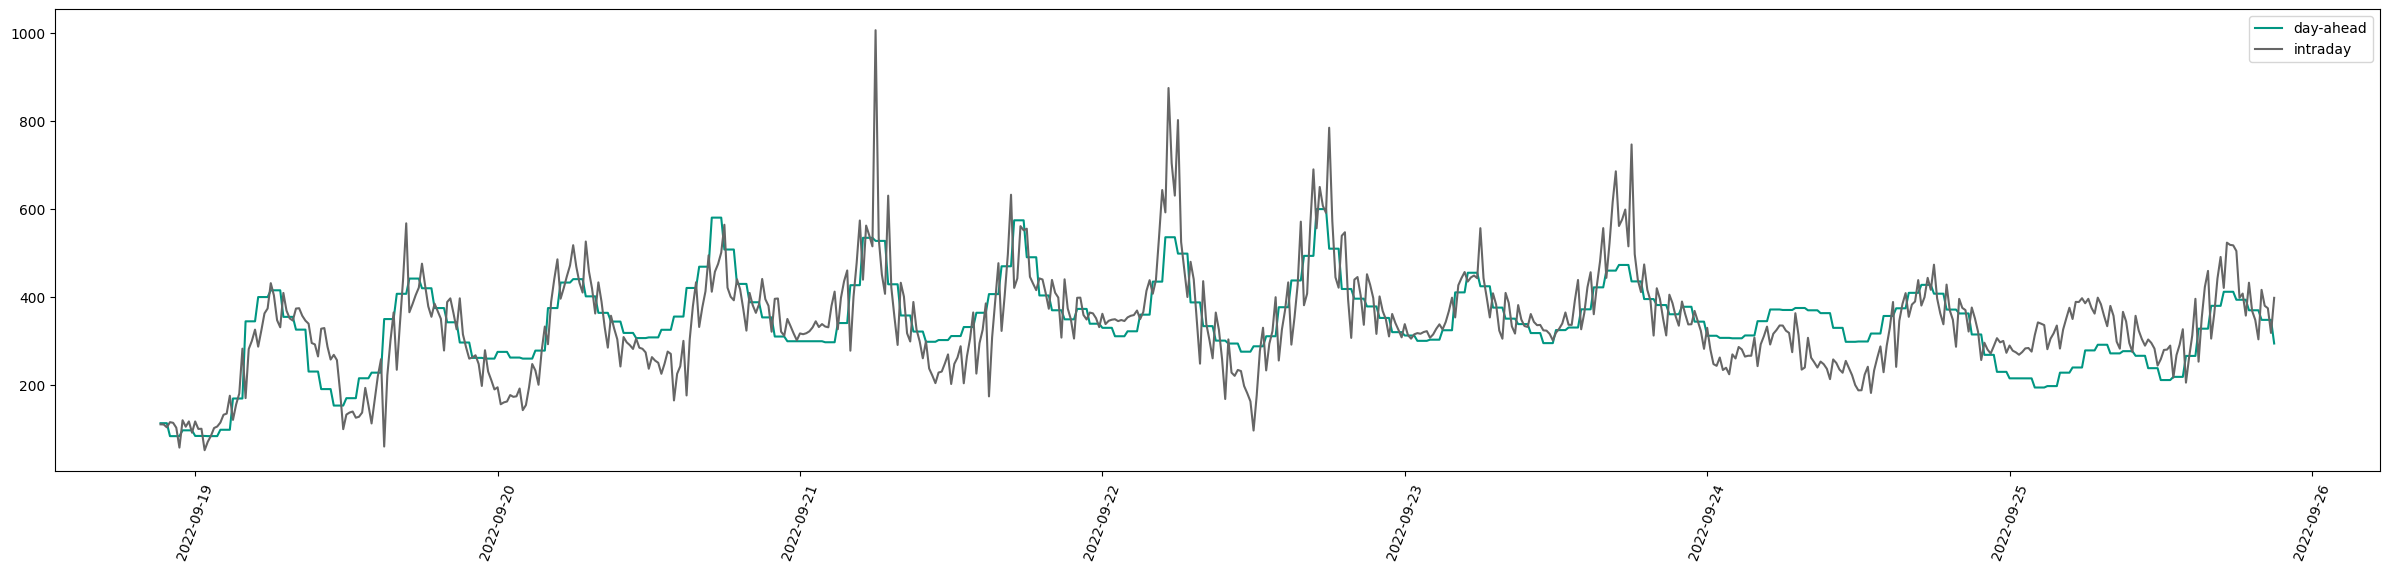

In [8]:
from matplotlib.pyplot import figure
fig, axs = plt.subplots(figsize = (30,6)) # This is your answer to resize the figure

plt.plot(df["day_ahead"].iloc[-24*4*7:], label = "day-ahead", c = "#009682", )
plt.plot(df["intraday_15min"].iloc[-24*4*7:], label = "intraday", color='#666666')
plt.legend()
plt.xticks(rotation=70)
plt.show()

In [22]:
print(f'Share of Nans in Intraday Continous Average Price {df["intraday_15min"].isna().sum() /len(df)}')

Share of Nans in Intraday Continous Average Price 0.0


In [11]:
plt.plot(prices["Intraday Continuous Average Price"].rolling(24).mean(), label = "intraday")
plt.plot(prices["Day-Ahead Auction"].rolling(24).mean(), label = "day-ahead")
plt.legend()
plt.show()

NameError: name 'prices' is not defined